In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import yfinance as yf
from scipy.stats import skew, kurtosis
import numpy as np

def calculate_statistics(tickers, start_date, end_date):
    # DataFrame to store results
    stats_df = pd.DataFrame(columns=['Ticker', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Sign Correlation', 'Volatility Correlation'])
    
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Calculate daily returns
        data['Return'] = data['Adj Close'].pct_change().dropna()
        
        # Calculate statistics
        mean_return = data['Return'].mean()
        std_return = data['Return'].std()
        skewness_return = skew(data['Return'].dropna())
        kurtosis_return = kurtosis(data['Return'].dropna(), fisher=False)  # Pearson's kurtosis

        # Calculate the deviations from the mean
        deviations = data['Return'] - mean_return

        # Calculate sign correlation
        sign_deviation = np.sign(deviations)
        sign_correlation = sign_deviation.corr(deviations)
        
        # Calculate volatility correlation
        abs_deviation = np.abs(deviations)
        squared_deviation = deviations ** 2
        volatility_correlation = abs_deviation.corr(squared_deviation)
        
        # Append results to the DataFrame
        stats_df = stats_df.append({
            'Ticker': ticker,
            'Mean': mean_return,
            'Standard Deviation': std_return,
            'Skewness': skewness_return,
            'Kurtosis': kurtosis_return,
            'Sign Correlation': sign_correlation,
            'Volatility Correlation': volatility_correlation
        }, ignore_index=True)
    
    return stats_df


In [3]:
selected_tickers = ['AAPL', 'JPM', 'PG', 'CVX', 'BA', 'JNJ', 'DIS', 'NVDA', 'BTC-USD']
start_date = '2020-01-01'
end_date = '2020-12-31'
stats_table = calculate_statistics(selected_tickers, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({


[*********************100%%**********************]  1 of 1 completed


C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({



[*********************100%%**********************]  1 of 1 completed


C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({


[*********************100%%**********************]  1 of 1 completed


C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({
C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({


[*********************100%%**********************]  1 of 1 completed


C:\Users\joydi\AppData\Local\Temp\ipykernel_28772\1177042208.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append({


In [5]:
stats_table.set_index('Ticker')

,Mean,Standard Deviation,Skewness,Kurtosis,Sign Correlation,Volatility Correlation
Ticker,,,,,,
AAPL,0.002769,0.029469,-0.055466,6.608039,0.696328,0.919937
JPM,0.000256,0.034354,0.395806,8.931817,0.664969,0.905499
PG,0.000744,0.020506,0.421576,11.477452,0.592725,0.914967
CVX,-0.000433,0.038588,-0.143385,13.482494,0.627871,0.897884
BA,-0.000168,0.055275,0.279451,7.853279,0.646243,0.930749
JNJ,0.000555,0.019137,0.358155,8.079735,0.626162,0.941583
DIS,0.001273,0.030963,0.603493,8.540724,0.659279,0.921654
NVDA,0.003808,0.036548,-0.245319,7.444054,0.707341,0.884285
BTC-USD,0.004589,0.037811,-2.191663,30.803448,0.613168,0.816444


In [25]:
def plot_adjusted_close_2x2(ticker, year):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    if stock_data.empty:
        print(f"No data found for {ticker} in {year}.")
        return

    stock_data['Quarter'] = pd.to_datetime(stock_data.index).quarter

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(f'Adjusted Close Price for {ticker} in {year}', fontsize=16)

    quarters = [1, 2, 3, 4]
    ax = axes.ravel()  # Flatten the 2x2 axes grid

    for i, quarter in enumerate(quarters):
        quarter_data = stock_data[stock_data['Quarter'] == quarter]
        
        if not quarter_data.empty:
            ax[i].plot(quarter_data.index, quarter_data['Adj Close'], label=f'Q{quarter}', color='b')
            ax[i].set_title(f'Q{quarter}')
            ax[i].set_xlabel('Date')
            ax[i].set_ylabel('Adj Close Price')
            ax[i].grid(True)
        else:
            ax[i].text(0.5, 0.5, f'No data for Q{quarter}', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



[*********************100%%**********************]  1 of 1 completed


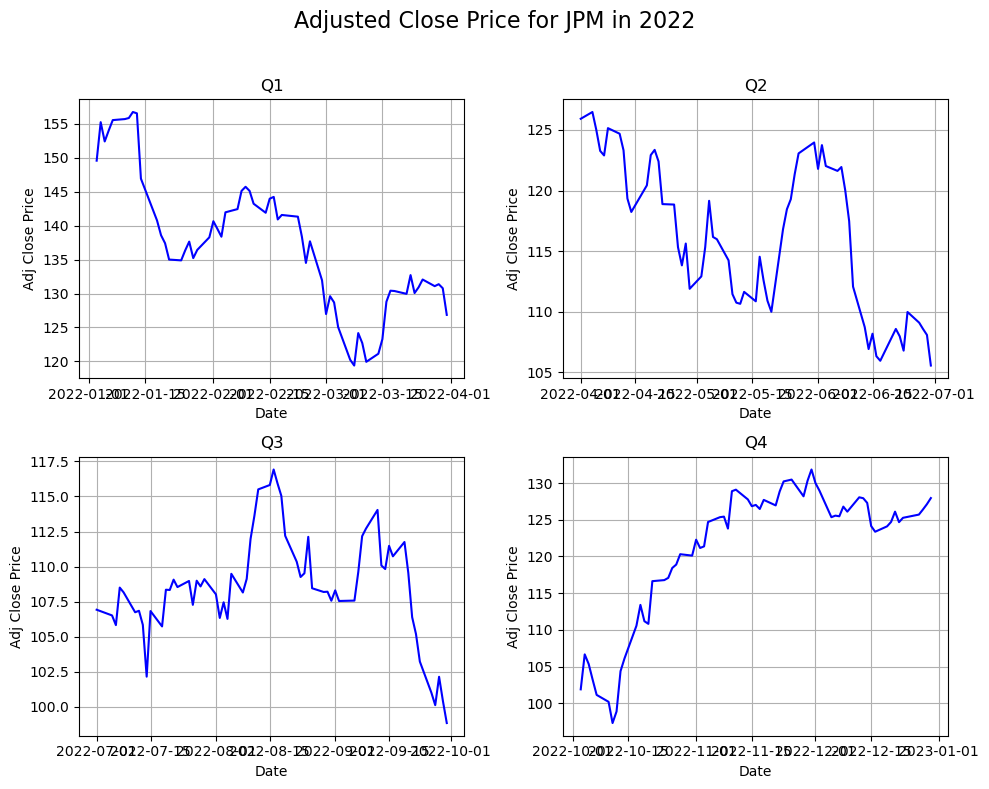

In [27]:
plot_adjusted_close_2x2('JPM', 2022)

In [22]:
def plot_adjusted_close_2x2(ticker, y1, y2, y3, y4, save_as_jpeg=False):
    years = [y1, y2, y3, y4]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(f'Adjusted Close Price for {ticker}', fontsize=16)

    ax = axes.ravel()

    for i, year in enumerate(years):
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        if stock_data.empty:
            ax[i].text(0.5, 0.5, f'No data for {year}', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)
        else:
            ax[i].plot(stock_data.index, stock_data['Adj Close'], label=f'{year}', color='b')
            ax[i].set_title(f'{year}')
            ax[i].set_xlabel('Date')
            ax[i].set_ylabel('Adj Close Price')
            ax[i].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    plt.subplots_adjust(bottom=0.15)
    
    if save_as_jpeg:
        filename = f'{ticker}_adjusted_close_{y1}_{y2}_{y3}_{y4}.jpeg'
        plt.savefig(filename, dpi=800, bbox_inches='tight')
        print(f'Plot saved as {filename}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Plot saved as JPM_adjusted_close_2020_2021_2022_2023.jpeg


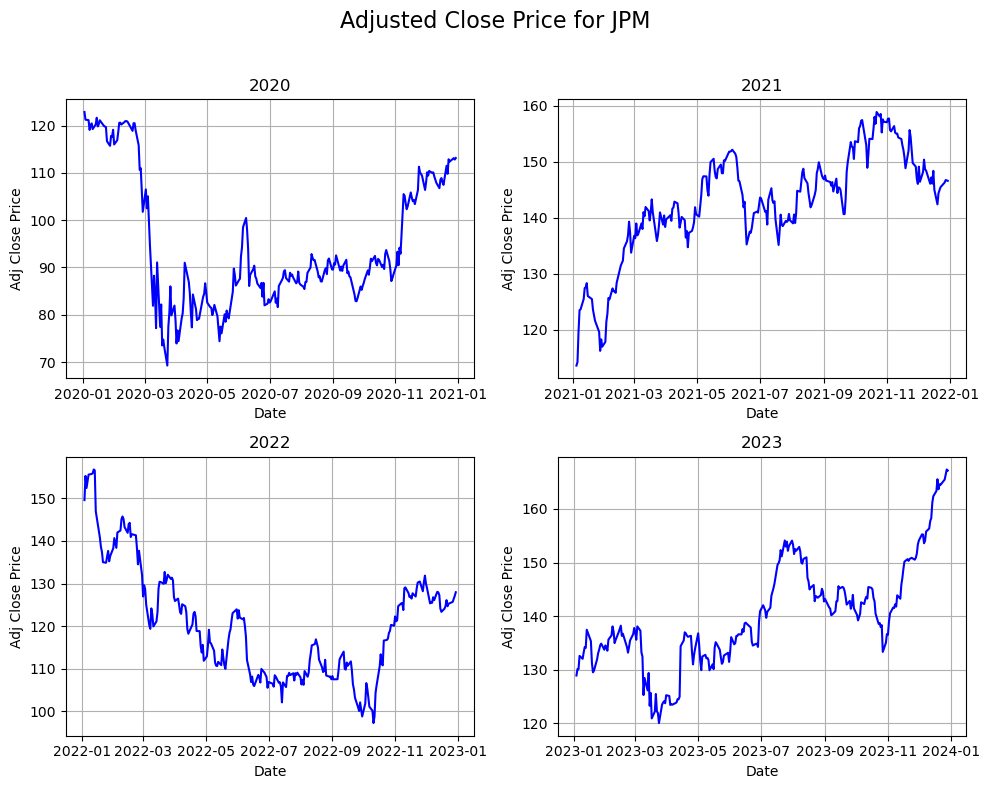

In [23]:
plot_adjusted_close_2x2('JPM', 2020, 2021, 2022, 2023,save_as_jpeg=True)